In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

#### write KMeans Class

In [39]:
class MyKMeans(BaseEstimator):
    def __init__(self, n_clusters=3, n_init=10,max_iter=300, tol=0.0001,random_state=None ):

        self.n_clusters = n_clusters #n_samples should be >= n_clusters
        self.max_iter = max_iter #Number of iterations should be a positive number
        self.tol = tol
        self.n_init = n_init #must be bigger than zero
        self.random_state = random_state
     
    def fit(self, X, y=None, sample_weight=None):
            
        df = pd.DataFrame(X)
        k_samples = df.sample(self.n_clusters,random_state = self.random_state)
        centroids = np.array(k_samples) 
        
        plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
        plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)
        
        centroids_old = np.zeros(centroids.shape) # to store old centers
        self.centroids_new = centroids.copy() # Store new centers
        
        n = X.shape[0]
        self.clusters = np.zeros(n)
        distances = np.zeros((n,self.n_clusters))
        inertia = np.zeros((self.n_clusters,1))
        
        prev_inertia, current_inertia = 0,1 

        delta_inertia = np.abs(current_inertia - prev_inertia) 
        counter = 0
        
        while delta_inertia > self.tol:
    
            for i in range(self.n_clusters):
                distances[:,i] = np.sqrt(((X - self.centroids_new[i])**2).sum(axis=1))


            self.clusters = np.argmin(distances, axis = 1)

            centroids_old = self.centroids_new.copy()

            for i in range(self.n_clusters):
                self.centroids_new[i] = np.mean(X[self.clusters == i], axis=0)


            for i in range(self.n_clusters):
                idx = np.where(self.clusters==i)
                inertia[i] = np.sum(((X[idx] - self.centroids_new[i])**2).sum(axis=1))


            prev_inertia = current_inertia
            current_inertia = inertia.sum()
            delta_inertia = np.abs(current_inertia - prev_inertia)
            counter += 1
            print('current_inertia',current_inertia,'prev_inertia',prev_inertia)
   

        display(self.centroids_new)
        print('final delta_inertia',delta_inertia,'counter',counter)

        plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
        plt.scatter(self.centroids_new[:,0], self.centroids_new[:,1], marker='*', c='r', s=150)

    def predict(self,X):
        n = X.shape[0]
        print(n)
        distances = np.zeros((n,self.n_clusters))
        for i in range(self.n_clusters):
            distances[:,i] = np.sqrt(((X - self.centroids_new[i])**2).sum(axis=1))

        predict_clusters = np.argmin(distances, axis = 1)
        return predict_clusters
        


(120, 2)
current_inertia 76.78405513784463 prev_inertia 1
current_inertia 45.2622623015873 prev_inertia 76.78405513784463
current_inertia 34.79656666666667 prev_inertia 45.2622623015873
current_inertia 32.590372230192884 prev_inertia 34.79656666666667
current_inertia 32.219644191229555 prev_inertia 32.590372230192884
current_inertia 32.01253298936835 prev_inertia 32.219644191229555
current_inertia 31.96614837398374 prev_inertia 32.01253298936835
current_inertia 31.96614837398374 prev_inertia 31.96614837398374


array([[6.8       , 3.06666667],
       [5.805     , 2.6775    ],
       [5.00243902, 3.44390244]])

final delta_inertia 0.0 counter 8
(30, 2)
30


array([0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 2, 1, 2, 2], dtype=int64)

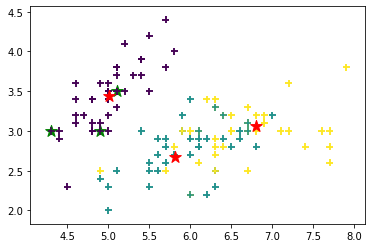

In [42]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = MyKMeans()
print(X_train.shape)
model.fit(X_train,y_train)
print(X_test.shape)
model.predict(X_test)

In [59]:
def plot_decision_boundaries(clusterer,X,resolution=1000,show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                       np.linspace(mins[1],maxs[1],resolution))
    Z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap=plt.cm.Spectral)
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    
    plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
    plt.scatter(clusterer.centroids_new[:,0], clusterer.centroids_new[:,1], marker='*', c='r', s=150)

    #plot_data(X)
    
#     if show_centroids:
#         plot_cntroids(clusterer.cluster_centers_)
    
    plt.xlabel("$x_1$",fontsize=14)
    plt.xlabel("$x_2$",fontsize=14,rotation=8)
        

current_inertia 34.88800662829235 prev_inertia 1
current_inertia 32.30297656002534 prev_inertia 34.88800662829235
current_inertia 32.011605467156265 prev_inertia 32.30297656002534
current_inertia 31.952043233082705 prev_inertia 32.011605467156265
current_inertia 31.952043233082705 prev_inertia 31.952043233082705


array([[5.84      , 2.6875    ],
       [6.81315789, 3.07105263],
       [5.        , 3.42142857]])

final delta_inertia 0.0 counter 5
1000000


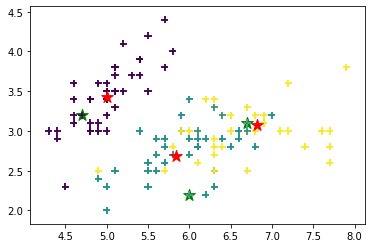

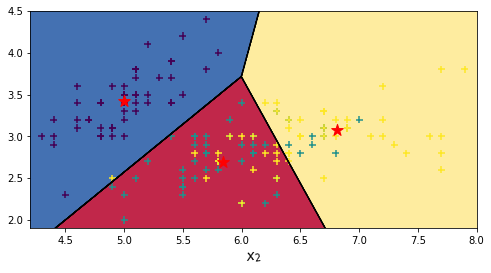

In [60]:
model = MyKMeans()
model.fit(X_train,y_train)

plt.figure(figsize=(8,4))
plot_decision_boundaries(model,X)
plt.show()

#### Kmean on iris DS

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

xmin1 = X[0].min()
xmin2 = X[1].min()
#print(xmin1,xmin2)

xmax1 = X[0].max()
xmax2 = X[1].max()
#print(xmax1,xmax2)

#xmean1 = X[0].mean()
#xmean2 = X[1].mean()
#print('mean',xmean1,xmean2)

#xstd1 = X[0].std()
#xstd2 = X[1].std()
#print('std',xstd1,xstd2)

#x_1 = np.random.uniform(low=xmin1, high=xmax1,size=3)
#x_2 = np.random.uniform(low=xmin2, high=xmax2,size=3)

k = 3

df = pd.DataFrame(X)
centers = df.sample(k)
# print('sample')
# print(centers)
# print('************************')
# print(centers.iloc[0][0],centers.iloc[0][1])


#np.random.randint(low=1, high=100, size=4)
#np.random.randint(low=1, high=100, size=4)



#centroids = np.array([[xmin1,xmin2], [xmean1,xmean2] ,[xmax1,xmax2]]) 
centroids = np.array(centers) #np.array([[centers.iloc[0][0],centers.iloc[0][1]], [centers.iloc[1][0],centers.iloc[1][1]] ,[centers.iloc[2][0],centers.iloc[2][1]]]) 
print(centroids)

plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)




In [ ]:
centroids_old = np.zeros(centroids.shape) # to store old centers
#display('centroids_old',centroids_old)
centroids_new = centroids.copy() # Store new centers
#display('centroids_new',centroids_new)

n = X.shape[0]
clusters = np.zeros(n)
distances = np.zeros((n,k))
inertia = np.zeros((k,1))
#display('clusters',clusters)
#display('distances',distances)

#print(centroids_new - centroids_old)
#print(((centroids_new - centroids_old)**2))
#print(((centroids_new - centroids_old)**2).sum(axis=1))

tolerance = 0.0001
prev_inertia, current_inertia = 0,1 

delta_inertia = np.abs(current_inertia - prev_inertia) #np.sqrt(((centroids_new - centroids_old)**2).sum(axis=1)) 
#display('error',error)
counter = 0
while delta_inertia > tolerance:
    print('counter', counter,'delta_inertia',delta_inertia)
    #display('X',X)
    for i in range(k):
    #         print(data - centroids[i])
    #         print(((data - centroids[i])**2))
    #         print(((data - centroids[i])**2).sum(axis=1))
    #         print(np.sqrt(((data - centroids[i])**2).sum(axis=1)))
        distances[:,i] = np.sqrt(((X - centroids_new[i])**2).sum(axis=1))
        #print('distances k=',i,distances[:,i])

    clusters = np.argmin(distances, axis = 1)
    #display('clusters argmin=',clusters)

    centroids_old = centroids_new.copy()

    for i in range(k):
#         print(X[clusters == 1])
#         print(np.mean(X[clusters == i], axis=0))
        centroids_new[i] = np.mean(X[clusters == i], axis=0)
   
        
    for i in range(k):
        
        idx = np.where(clusters==i)
        #print('idx',idx)
        inertia[i] = np.sum(((X[idx] - centroids_new[i])**2).sum(axis=1))
        #print('inertia',inertia)

    prev_inertia = current_inertia
    current_inertia = inertia.sum()
    delta_inertia = np.abs(current_inertia - prev_inertia)
    counter += 1
    print('current_inertia',current_inertia,'prev_inertia',prev_inertia)
   

display(centroids_new)
print('final delta_inertia',delta_inertia,'counter',counter)

plt.scatter(X[:,0], X[:,1],marker='+',c=y, s=50)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='g', s=150)

#### Kmeans sample page 397

In [ ]:
k = 3

centroids = np.array([[0,0],[16,0],[16,6]],dtype=float)
data = np.array([[0,0],[8,0],[8,6],[16,0],[0,6],[16,6],[5,5]])


plt.scatter(data[:,0], data[:,1],marker='+', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)

    

In [ ]:
#run k = 1

centroids_old = np.zeros(centroids.shape) # to store old centers
display('centroids_old',centroids_old)
centroids_new = centroids.copy() # Store new centers
display('centroids_new',centroids_new)

n = data.shape[0]
clusters = np.zeros(n)
distances = np.zeros((n,k))
inertia = np.zeros((k,1))
#display('clusters',clusters)
#display('distances',distances)

#print(centroids_new - centroids_old)
#print(((centroids_new - centroids_old)**2))
#print(((centroids_new - centroids_old)**2).sum(axis=1))

tolerance = 0.0001
prev_inertia, current_inertia = 0,1 

delta_inertia = current_inertia - prev_inertia #np.sqrt(((centroids_new - centroids_old)**2).sum(axis=1)) 
#display('error',error)

while delta_inertia > tolerance:

    display('data',data)
    for i in range(k):
    #         print(data - centroids[i])
    #         print(((data - centroids[i])**2))
    #         print(((data - centroids[i])**2).sum(axis=1))
    #         print(np.sqrt(((data - centroids[i])**2).sum(axis=1)))
        distances[:,i] = np.sqrt(((data - centroids[i])**2).sum(axis=1))
        print('distances k=',i,distances[:,i])

    clusters = np.argmin(distances, axis = 1)
    display('clusters argmin=',clusters)

    centroids_old = centroids_new.copy()

    for i in range(k):
        print(np.mean(data[clusters == i], axis=0))
        centroids_new[i] = np.mean(data[clusters == i], axis=0)

    display(centroids_new)
    error -= 1 
    
    for i in range(k):
        
        idx = np.where(clusters==i)
        print('idx',idx)
        inertia[i] = np.sum(((data[idx] - centroids_new[i])**2).sum(axis=1))
        print('inertia',inertia)

    prev_inertia = current_inertia
    current_inertia = inertia.sum()
    delta_inertia = current_inertia - prev_inertia
    print('current_inertia',current_inertia)

print('final delta_inertia',delta_inertia)

plt.scatter(data[:,0], data[:,1],marker='+', s=50)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c='g', s=150)